In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load csv 
url = 'https://raw.githubusercontent.com/kfern/jupyter/next/covid19-es-and/covid19-es-and.csv'
df = pd.read_csv(url)

In [3]:
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)
last_fecha = df['Fecha'].max()

In [4]:
fFechas = pd.date_range(end=last_fecha, freq='7D', periods=4)
filtro = df['Fecha'].isin(fFechas)
dfV = df[filtro].copy()

In [5]:
dfV.set_index(['Provincia', 'Fecha'], inplace=True)
dfV.sort_index(level=['Provincia', 'Fecha'], inplace=True)

In [6]:
dfG = dfV.groupby(level='Provincia').pct_change()*100
dfG.dropna(how='all', inplace=True)
dfG.tail()

Ingresados       Altas      Bajas
Provincia Fecha                                        
Sevilla   2020-04-16   13.501144  110.471204  34.042553
          2020-04-23    7.358871   36.318408  19.576720
Total     2020-04-09   33.536585  423.245614  90.087464
          2020-04-16   13.633399  120.787930  39.877301
          2020-04-23    7.462687   46.051632  18.311404

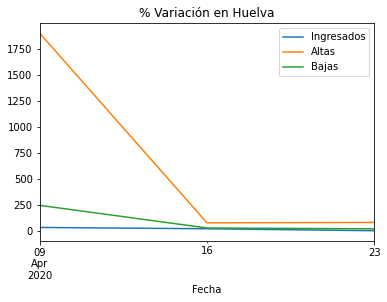

In [7]:
dfG.loc['Huelva'].plot(title='% Variación en Huelva')
plt.show()

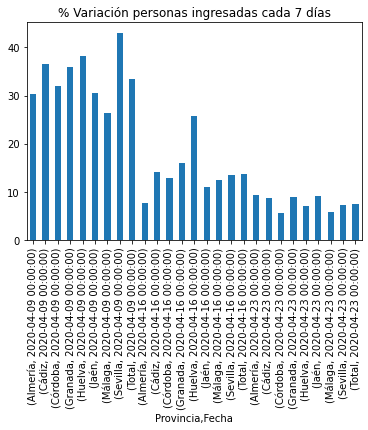

In [8]:
dfG.sort_index(level=['Fecha', 'Provincia'], inplace=True)
dfG['Ingresados'].plot(kind='bar', title='% Variación personas ingresadas cada 7 días')
plt.show()

In [9]:
dfG.describe()

,Ingresados,Altas,Bajas
count,27.000000,27.000000,27.000000
mean,18.628909,301.731664,57.173728
std,12.110598,479.104477,52.671795
min,5.636743,4.365079,12.322275
25%,8.780097,64.275816,27.205882
50%,13.501144,117.464789,40.000000
75%,30.354374,266.218765,61.590398
max,43.044190,1900.000000,250.000000


In [10]:
# Nuevos casos cada x días
dfN = dfV.diff()
first_fecha = fFechas.min()

# Se borra la primera fila ya que no tiene valores anteriores y su resultado no tiene sentido
dfN.drop(index=first_fecha, level='Fecha', inplace=True)
# Alternativa seleccionando las filas y borrando
#delete_rows = dfN.loc[(slice(None), [first_fecha]), :].index
#dfN.drop(delete_rows, inplace=True)

# Se borran las filas de Total
dfN.drop(index='Total', level='Provincia', inplace=True)

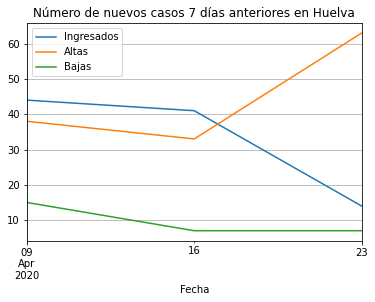

In [11]:
dfN.loc['Huelva'].plot(title='Número de nuevos casos 7 días anteriores en Huelva', grid=True)
plt.show()

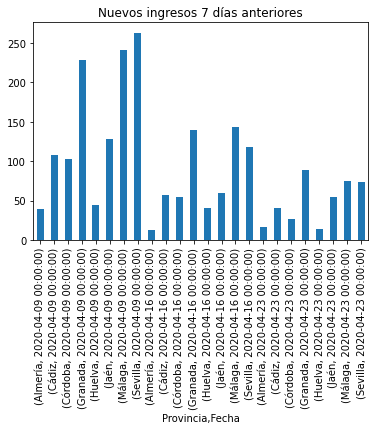

In [12]:
dfN.sort_index(level=['Fecha', 'Provincia'], inplace=True)
dfN['Ingresados'].plot(kind='bar', title='Nuevos ingresos 7 días anteriores')
plt.show()

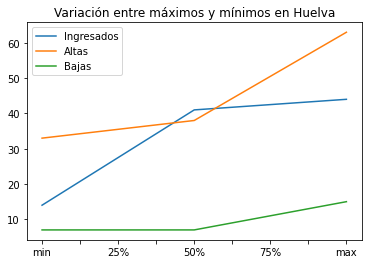

In [13]:
dfN.loc['Huelva'].describe().loc['min':'max'].plot(title='Variación entre máximos y mínimos en Huelva')
plt.show()

In [14]:
print('Nuevos casos en los 7 días anteriores')
print(dfN.sort_index())

Nuevos casos en los 7 días anteriores
                      Ingresados  Altas  Bajas
Provincia Fecha                               
Almería   2020-04-09        39.0   41.0    9.0
          2020-04-16        13.0   27.0   11.0
          2020-04-23        17.0   95.0    6.0
Cádiz     2020-04-09       108.0  106.0   26.0
          2020-04-16        57.0  136.0   23.0
          2020-04-23        40.0   50.0   20.0
Córdoba   2020-04-09       103.0  124.0   20.0
          2020-04-16        55.0  170.0   18.0
          2020-04-23        27.0   99.0   20.0
Granada   2020-04-09       229.0  182.0   56.0
          2020-04-16       139.0  275.0   45.0
          2020-04-23        89.0  467.0   32.0
Huelva    2020-04-09        44.0   38.0   15.0
          2020-04-16        41.0   33.0    7.0
          2020-04-23        14.0   63.0    7.0
Jaén      2020-04-09       128.0   59.0   45.0
          2020-04-16        60.0  172.0   44.0
          2020-04-23        55.0   11.0   19.0
Málaga    2020-04-09  